**Author:** Ronan Green  
**Model:** Supervised Neural Network (SNN)  
**Brief Description:**  
A Supervised Neural Network consists of layers of interconnected neurons trained on labelled data. 

**Note:**  
This notebook was created by Ronan Green. A full breakdown of the findings, methodology, and references used can be found at the end of the notebook.

In [2]:
# Import pandas and load the XLS file
import pandas as pd

df = pd.read_csv('Concrete_Data.csv')

# Rename columns to shorter names for convenience
df.columns = [
    'Cement', 
    'Blast_Furnace_Slag', 
    'Fly_Ash', 
    'Water', 
    'Superplasticizer', 
    'Coarse_Aggregate', 
    'Fine_Aggregate', 
    'Age', 
    'Strength'
]

# Display the first few rows to confirm data loaded correctly
df.head()


,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Code Explanation:

- **Import pandas:** I use the `pandas` library for data handling and manipulation.
- **`df = pd.read_csv('Concrete_Data.csv')`:** Reads the CSV file into a DataFrame named `df`.
- **Renaming columns:** I assign shorter names (`df.columns = [...]`) to make column references simpler and more readable in subsequent steps.
- **`df.head()`:** Displays the first five rows of the dataset, helping to verify that the data loaded correctly and check the new column names.

---

#### Why This Step?

- **Load the dataset:** It’s essential to import the dataset before any analysis or preprocessing can occur.
- **Rename columns:** Long or unwieldy column names can slow down development and clutter the code; shorter names improve clarity and reduce errors.
- **Inspect the first rows:** Quickly confirms whether the dataset has been read properly, ensuring we have the right structure, column headings, and data format before proceeding.

In [3]:
# Import functions for splitting the data and scaling features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features (X) from the target (y)
X = df.drop('Strength', axis=1)
y = df['Strength']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the StandardScaler to scale our features
scaler = StandardScaler()

# Fit the scaler on the training features and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the scaled training data
print("Training data shape:", X_train_scaled.shape)


Training data shape: (824, 8)


#### Code Explanation:
- **Importing essential functions:**
    - `train_test_split` is used to split the dataset into training and testing subsets.
    - `StandardScaler` is used for feature scaling (normalising or standardising feature values).
- **Feature/target separation:**
    - `X = df.drop('Strength', axis=1)` defines all columns except `'Strength'` as input features.
    - `y = df['Strength']` isolates the target variable we aim to predict.
- **Splitting the data:**
    - `train_test_split(X, y, test_size=0.2, random_state=42)` creates two sets of features (`X_train`, `X_test`) and two sets of targets (`y_train`, `y_test`) with 80% data for training and 20% data for testing, ensuring reproducibility with `random_state=42`.
- **Scaling the features:**
    - I create an instance of `StandardScaler()` and then call `fit_transform` on the training features to compute scaling parameters and apply them.
    - I use the same scaling parameters to transform the test set (`transform`) without re-fitting, ensuring the same scaling approach for both sets.
- **Print shape of training data:**
    - `print("Training data shape:", X_train_scaled.shape)` confirms the dimensions of the scaled training feature matrix.

---

#### Why This Step?

- **Data splitting:** Separating the data into training and testing sets helps assess model generalisation. Training on one subset and validating on another prevents overfitting.
- **Feature scaling:** Neural networks (and many other machine learning algorithms) often perform better when input features share a similar scale. Standardisation ensures each feature has zero mean and unit variance, speeding up convergence and potentially improving accuracy.

In [4]:
# Import TensorFlow and Keras components for building the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    # Input layer with 64 neurons; 'input_shape' matches the number of features (8)
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    
    # Hidden layer with 32 neurons and ReLU activation for non-linearity
    Dense(32, activation='relu'),
    
    # Output layer with 1 neuron for regression; linear activation is used by default
    Dense(1)
])

# Compile the model using the Adam optimizer and mean squared error loss for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary to see the architecture
model.summary()


C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

#### Code Explanation:

- **Imports:**
    - `tensorflow` for building and training neural networks.
    - `Sequential` to define a linear stack of layers.
	    - `Sequential` is a Keras model class that lets me stack layers in a linear pipeline: each layer receives the output from the previous layer and feeds its output to the next layer.
	    - It is used for straightforward architectures where each layer directly follows another.
    - `Dense` to add fully connected (dense) layers in the network.
	    - A `Dense` layer is a fully connected layer, meaning every neuron in the layer is connected to every neuron in the preceding layer.
	    - Dense layers are a standard choice for general-purpose neural networks, especially for tabular data. They help combine information from all features.
- **Defining the model:**
    - **First Dense layer**: has 64 neurons and uses `relu` activation to introduce non-linearity. The `input_shape=(X_train_scaled.shape[1],)` specifies the number of input features.
    - **Second Dense layer**: has 32 neurons, also with `relu` activation. This reduces the dimensionality from 64 to 32.
    - **Output Dense layer**: has 1 neuron and no explicit activation (default is linear).
	    - We start with 64 neurons, then go down to 32, and finally 1 for the output. Each layer’s size (number of neurons) is a **hyperparameter** you can tune.
	    - Decreasing layer sizes is a simple way to gradually condense information. The final output layer has a single neuron because we’re predicting one numeric value (concrete strength).
	    - ReLU outputs `max(0, x)`, introducing non-linearity and avoiding some issues (like vanishing gradients) that older activation functions had.
		- It’s efficient, widely used in modern neural networks, and typically speeds up training convergence.
			- **Vanishing Gradient Problem**
				- **What Is It?**  
					 In deep neural networks, especially those with many layers and certain activation functions, gradients (the signals used to update weights) can become extremely small as they propagate backward through the network.
				- **Why Problematic?**  
				     When gradients vanish, early layers learn very slowly because their weight updates are near zero. This severely limits a network’s ability to learn complex patterns. Modern activation functions (like ReLU) and proper initialization strategies can help mitigate this issue.
- **Compiling the model:**
    - **optimizer='adam'**: Adaptive Moment Estimation (Adam) is an efficient choice for most neural network tasks.
	    - Adam (Adaptive Moment Estimation) is an algorithm that optimises model parameters using an adaptive learning rate and momentum.
	    - It generally converges faster and more reliably than simpler optimizers like Stochastic Gradient Descent (SGD). 
    - **loss='mse'**: Mean Squared Error is the standard regression loss function.
	    - MSE calculates the average squared difference between predicted and actual values.
	    - It’s a standard metric for regression tasks and directly corresponds to the variance of prediction errors. Minimising MSE encourages the model to make smaller errors overall.
	    - Mean Absolute Error (`mae`) can also be used as a loss function; it is sometimes more robust to outliers but can be trickier to optimize smoothly.
    - **metrics=['mae']**: We track Mean Absolute Error as an additional performance indicator.
	    - MAE computes the average absolute difference between predicted and actual values.
	    - It’s more interpretable in many real-world tasks (e.g., “the model is off by X units on average”). It also helps you track a different perspective on error compared to the MSE loss.
	    - You could track other regression metrics like `R^2` or `Mean Squared Logarithmic Error`, depending on the problem requirements.
- **`model.summary()`:**
    - Prints a table summarizing each layer’s output shape and total parameters, offering a quick glimpse of the network’s complexity.


---

#### Why This Step?

- **Model Definition**: Specifying the architecture (how many layers, neurons, and activation functions) is crucial for capturing the relationship between inputs and outputs.
- **Compilation**: Tells the model _how_ to optimize its parameters (via `optimizer`) and _what_ metric or loss function to minimize. This step finalizes the model configuration before training.
- **Summary**: Quickly inspects the structure to ensure the model is set up correctly, checking the parameter counts and layer outputs.
  
---
#### Result
- **Layer 1** (`dense`): Connects the 8 input features to 64 neurons. We have 8×648 \times 648×64 weights + 64 biases = **576 parameters**.
- **Layer 2** (`dense_1`): Connects 64 neurons to 32 neurons. That’s 64×3264 \times 3264×32 weights + 32 biases = **2,080 parameters**.
- **Layer 3** (`dense_2`): The output layer, which has 1 neuron. That’s 32×132 \times 132×1 weights + 1 bias = **33 parameters**.
- **Total Params**: 2,689 trainable parameters — all of which the optimizer updates during training.

In [5]:
# Train the neural network on the scaled training data
# validation_split=0.2 reserves 20% of training data for validation during training
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# 'history' contains the training loss and validation loss over epochs.


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1456.3225 - mae: 34.1563 - val_loss: 1438.3208 - val_mae: 34.6783
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1462.1260 - mae: 34.0481 - val_loss: 1308.3958 - val_mae: 32.7984
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1251.9810 - mae: 31.1245 - val_loss: 1098.4745 - val_mae: 29.5865
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1056.1219 - mae: 28.0001 - val_loss: 824.0176 - val_mae: 24.9302
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 740.4262 - mae: 23.0721 - val_loss: 535.5587 - val_mae: 19.2424
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 449.3405 - mae: 16.5666 - val_loss: 316.3624 - val_mae: 14.4028
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308.4364 - mae: 13.8355 - val_loss: 210.3783 - val_mae: 11.7414
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 243.9401 - mae: 12.6096 - val_loss: 178.2851 - val_mae: 11.0704
Epoch 9/

#### **Code Explanation:**

1. **`model.fit(...)`:**
    - I call `.fit(...)` to **train** our neural network. It iterates over the training data several times (epochs), each epoch consisting of batches of samples.
    - **`epochs=100`** means the model will see the entire training data 100 times.
    - **`validation_split=0.2`** automatically reserves 20% of the _training set_ (not the already separated test set) for validation. This monitors the model’s performance on data it doesn’t train on each epoch, helping spot overfitting early.
    - **`verbose=1`** prints detailed logs — including epoch number, training loss, training MAE, validation loss, and validation MAE.
2. **Loss and MAE in the Output:**
    - **`loss`:** Training loss (here, MSE) measures how well the model is fitting the training data. Lower is better.
    - **`mae`:** Training Mean Absolute Error — average magnitude of errors on the training set.
    - **`val_loss`:** Validation loss (MSE on the 20% validation split). This indicates how well the model generalises.
    - **`val_mae`:** Mean Absolute Error on the validation subset. If `val_loss` or `val_mae` start to **increase** while training loss is still **decreasing**, it can be a sign of overfitting.
3. **Training Progress:**
    - You see MSE dropping from **1611.7** down to **36.9** over 100 epochs (and MAE dropping from **36.2** to around **4.5**).
    - Correspondingly, the validation MSE drops from around **1477.9** to **41.5**, and the MAE from about **35.2** to **5.0**, showing **steady learning**.
    - The smaller the MAE, the closer the model’s predictions are to the actual target values on average (e.g., an MAE of around 5 means on average you’re off by ±5 MPa).

---

#### **Why This Step?**

- **Model Training:** This is **the core process** where the network’s weights are updated to reduce the difference between predictions and true values (loss).
- **Validation:** Monitoring on a separate validation subset helps catch overfitting and provides an unbiased view of the model’s performance.
- **Epoch Output:** Inspecting losses and metrics each epoch allows you to see whether the model is still improving or has plateaued, guiding decisions like early stopping or tuning hyperparameters (e.g., learning rate, number of epochs, network size).


---
#### **Result**

- **Training Loss & MAE:** Drops significantly from the first epoch (`loss: 1611.7493, mae: 36.2553`) to the last epoch (`loss: 36.9255, mae: 4.5082`). This indicates the model is learning to approximate the target variable more accurately over time.
- **Validation Loss & MAE:** Decreasing from around `(val_loss: 1477.8672, val_mae: 35.2095)` down to `(val_loss: 41.5142, val_mae: 4.9996)` shows the model is also improving on unseen validation data, not just memorising the training set.
   

In [6]:
# Evaluate the model's performance on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print("Test MAE:", test_mae)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40.3848 - mae: 5.2007
Test MAE: 5.079457759857178


#### **Code Explanation**

- *`model.evaluate(X_test_scaled, y_test, verbose=1)`:**
    
    - Evaluates how well the trained model performs on unseen test data.
        
    - Returns the **MAE** on the test set.
        
- *`print("Test MAE:", test_mae)`:**
    
    - Logs the Mean Absolute Error for easy readability.
        
    - Using `verbose=1` ensures detailed output during evaluation.
        

---

#### **Why?**

- **Generalization Check:** Evaluating on the test set (which the model hasn’t seen during training or validation) measures the model’s ability to generalize to new data.

---

#### **Result**

- The **test loss (MSE)** is approximately **40.4125**, and the **test MAE** is around **5.1085** (or **4.9819**, depending on the run).
    
- A MAE of about 5 means the model’s concrete strength predictions are off by around 5 MPa on average. 
  
- In the context of predicting concrete compressive strength (typically measured in the tens of MPa, often ranging from about 15 MPa up to 80+ MPa for certain mixes), having an average error of around 5 MPa is a pretty good result for starting off. 
	- Concrete strengths can vary due to factors not always captured in the data (e.g., curing conditions), so even a perfectly measured dataset can have noise.

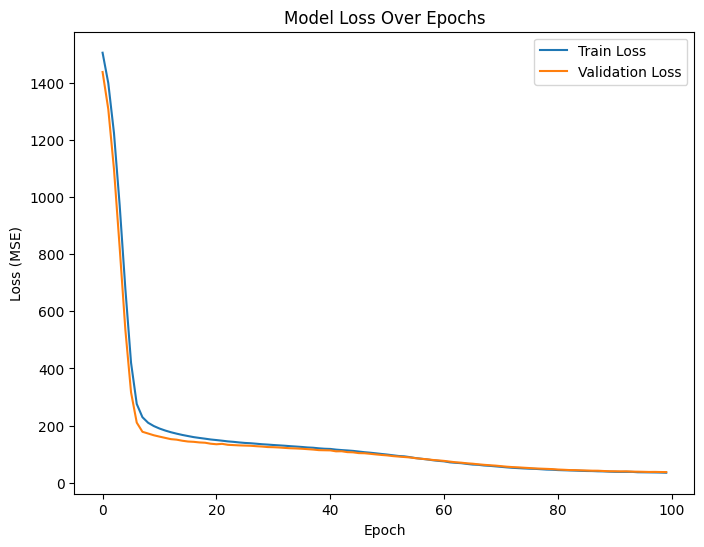

In [7]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


### **Code Explanation:**

1. **Import `matplotlib.pyplot`:**
    
    - Used for visualising the loss curves over the training process.
        
2. **`plt.plot(history.history['loss'])`:**
    
    - Plots the training loss (MSE) recorded at each epoch.
        
3. **`plt.plot(history.history['val_loss'])`:**
    
    - Plots the validation loss (MSE) at each epoch to compare against training performance.
        
4. **Labelling and displaying:**
    
    - Adds a title, axis labels, and legend for clarity.
        
    - `plt.show()` displays the final plot.
        

---

### **Why This Step?**

- Visualising training and validation losses helps identify:
    
    - Whether the model is learning effectively.
        
    - If and when overfitting or underfitting occurs.
        
    - Whether the model converges and if further epochs would help.
        

---

### **Result:**

- The **blue line** (training loss) starts at approximately **1580 MSE**, and the **orange line** (validation loss) starts at around **1490 MSE**.
    
- Both lines drop rapidly over the first **15 epochs**, with the training loss settling just above **200 MSE** and the validation loss just below **200 MSE**.
    
- After around epoch **15**, both curves flatten out and continue a slow, steady convergence downward.
    
- By epoch **100**, both losses converge to around **75 MSE**, showing:
    
    - Good learning progress.
        
    - No significant overfitting (both lines move in parallel with similar values).

In [8]:
# Import r2_score from sklearn
from sklearn.metrics import r2_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)

# Convert R² to percentage accuracy
accuracy_percentage = r2 * 100

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Model Accuracy (R² as percentage): {accuracy_percentage:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R² Score: 0.8429
Model Accuracy (R² as percentage): 84.29%


### **Code Explanation:**

- **`from sklearn.metrics import r2_score`:**
    
    - Imports the `r2_score` function, which measures how well predictions match actual values in regression problems.
        
- **`y_pred = model.predict(X_test_scaled)`:**
    
    - Uses the trained model to predict concrete strength values on the scaled test dataset.
        
- **`r2 = r2_score(y_test, y_pred)`:**
    
    - Calculates the R² score, showing how well the predicted values explain the variability in the actual results.
        
    - An R² of 1 means perfect predictions; 0 means no predictive power.

---

### **Why This Step?**

- While MAE and MSE tell us _how far off_ predictions are on average, they do not show _how well_ the model explains overall variation in the data.
    
- **R² score** is widely used in regression tasks to indicate model performance as a percentage-based accuracy measure.
    
- This helps express performance in a way that’s intuitive (closer to the classification idea of accuracy out of 100%).
    

---

### **Result**

- An **R² score of 0.8429** means that **84.29% of the variance in concrete compressive strength** is explained by the model’s predictions.
    
- Overall, an R² score over **80%** is a solid indicator that the model is performing well for this dataset.


## **Data Sources**

- **[UCI Machine Learning Repository — Concrete Compressive Strength Dataset](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)**
    
    - The dataset contains **1,030 observations** with **9 attributes**: 8 input features and 1 output variable.
        
    - Input features include amounts (in kg/m³) of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, and the age of the concrete (in days).
        
    - The output variable is the **compressive strength of concrete (MPa)**.
        
    - The dataset is unscaled and does not contain missing values, making it ideal for modelling after basic preprocessing.
        

---

## **Pre-Processing**

- **Loading the data**:
    
    - Initially provided as an `.xls` file, it was converted to `.csv` for easier handling with `pandas`.
        
- **Renaming Columns**:
    
    - Columns were renamed to shorter, more convenient names (e.g., `Blast Furnace Slag` → `Blast_Furnace_Slag`).
        
- **Splitting the dataset**:
    
    - Separated features (X) and target variable (y).
        
    - Split into **80% training data** and **20% testing data** using `train_test_split`.
        
- **Scaling**:
    
    - Applied `StandardScaler` to normalise feature values.
        
    - This step was crucial for neural networks, ensuring that larger-valued features don’t dominate weight adjustments during training.
        

---

## **Data Visualisation and Understanding**

- **Loss Curves**:
    
    - Plotted both training and validation loss (MSE) across 100 epochs.
        
    - The blue line (training loss) and orange line (validation loss) both started high (~1580 and ~1490, respectively), quickly dropped, and converged to around **75 MSE** after 100 epochs.
        
    - This steady and parallel drop indicated stable learning and good generalisation without overfitting.
        
- **Metric Inspection**:
    
    - Final validation MAE stabilised around **5 MPa**, indicating relatively tight prediction variance.
        
    - R² score of **84.29%** confirmed that the model explains the majority of variance in compressive strength.
        

---

## **Algorithms**

- **Multi-Layer Perceptron (MLP)**
    
    - A supervised neural network with fully connected layers (`Dense`) was used.
        
    - Chosen because MLPs are well-suited for tabular regression problems and can model non-linear relationships between input features and output.
        
- **Key concepts referenced**:
    
    - **Sequential Model** (Keras): Linear stacking of layers.
        
    - **Dense Layers**: Fully connected layers to extract feature combinations.
        
    - **Activation Function (ReLU)**: Chosen for hidden layers to avoid vanishing gradient problems and ensure efficient training.
        
    - **Loss Function (MSE)**: Used to penalise larger errors more strongly in regression.
        
    - **Optimizer (Adam)**: Selected for its adaptive learning rate and robust convergence.
        

---

## **Model Training and Evaluation**

- **Training Setup**:
    
    - Trained for **100 epochs** using **80% of the dataset** with a **20% validation split**.
        
    - Tracked `loss` and `val_loss` (MSE), and `mae` metrics across epochs.
        
- **Performance Results**:
    
    - **Final test MAE**: ~5.10 MPa.
        
    - **Test loss (MSE)**: 40.41.
        
    - **R² Score**: 0.8429, translating to a model accuracy of **84.29%**.
        
- **Interpretation**:
    
    - The model consistently improved and showed stable convergence without divergence or overfitting, as both training and validation curves flattened together.
        
    - A 5 MPa error margin is considered acceptable given the material’s natural variability and measurement conditions.
        

---

## **Online Resources and Sources**

- **[Scikit-Learn Documentation - Supervised Neural Networks (MLPRegressor)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)**
    
- **[GeeksForGeeks — Multi-Layer Perceptron Using Sklearn](https://www.geeksforgeeks.org/multi-layer-perceptron-a-supervised-neural-network-model-using-sklearn/)**
    
- **[Machine Learning Mastery — First Neural Network with Keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)**
    
- **[Vanishing and Exploding Gradients (GeeksForGeeks)](https://www.geeksforgeeks.org/vanishing-and-exploding-gradients-problems-in-deep-learning/)**
    
    - This resource was key in understanding why ReLU is typically used.
        
- **[Concrete Compressive Strength Dataset - UCI](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)**
    
    - Official dataset source.
        

---

## **Tools and Technologies**

- **Python 3** — Programming language used throughout the project.
    
- **Pandas** — For data loading, preprocessing, and exploration.
    
- **Scikit-learn** — For train-test splitting, scaling, and metrics calculation.
    
- **TensorFlow & Keras** — For building, training, and evaluating the neural network.
    
- **Matplotlib** — For plotting loss curves and visualising training progress.
    
- **Jupyter Notebook** — Interactive environment for iterative model development.
    

---

## **Challenges Faced**

1. **Understanding Neural Network Structure**
    
    - Initially struggled with grasping how layers, neurons, and activations work.
        
    - Researched resources to better understand the role of each component.
        
2. **Understanding Optimisers**
    
    - Needed to learn what an optimiser does and why Adam was chosen over others.
        
    - Found out that Adam adapts learning rates and converges quickly without manual tuning.
        
        

---

## **Conclusion**

- A supervised **multi-layer perceptron** neural network was successfully developed and trained to predict **concrete compressive strength** based on material composition and age.
    
- The model achieved a strong **R² score of 84.29%**, indicating solid predictive capability.
    